In [56]:
import pandas as pd
import numpy as np
from pandas.api.types import is_numeric_dtype
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

### Sample dataset pe care se poate testa analiza discriminata

In [8]:
iris = load_iris()

#convert dataset to pandas DataFrame
df_iris = pd.DataFrame(data = np.c_[iris['data'], iris['target']],
                 columns = iris['feature_names'] + ['target'])
df_iris['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df_iris.columns = ['s_length', 's_width', 'p_length', 'p_width', 'target', 'species']

Datele sunt deja scalate asa ca nu mai folosim linearScaler pentru a le aduce la alta forma

In [9]:
df_iris

,s_length,s_width,p_length,p_width,target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0,virginica
146,6.3,2.5,5.0,1.9,2.0,virginica
147,6.5,3.0,5.2,2.0,2.0,virginica
148,6.2,3.4,5.4,2.3,2.0,virginica


### Ce face analiza discriminanta 
- Analiza discriminanta se foloseste pentru a clasifica o variabla de raspuns in doua sau mai multe clase, bazat pe mai multe variabile predictor
    - Exemplu: Vrem sa clasificam specia unei flori iris dupa dimensiunile petalelor etc...

### 1_ Calcul scoruri discriminate in model liniar
- Pentru a calcula scorurile trebuie mai intai sa decidem care este variabila de raspuns si care sunt variabilele predictor
    - X --> Array care contine variabilele predictor --> s_length, s_width ...
    - Y --> Array care contine variabilele raspuns --> species


In [22]:
df_predictor = df_iris.iloc[:, 0:4]
df_response = df_iris['species']

model = LinearDiscriminantAnalysis()
model.fit(df_predictor, df_response)

discriminant_scores = model.transform(df_predictor)
discriminant_scores

array([[ 8.06179978e+00, -3.00420621e-01],
       [ 7.12868772e+00,  7.86660426e-01],
       [ 7.48982797e+00,  2.65384488e-01],
       [ 6.81320057e+00,  6.70631068e-01],
       [ 8.13230933e+00, -5.14462530e-01],
       [ 7.70194674e+00, -1.46172097e+00],
       [ 7.21261762e+00, -3.55836209e-01],
       [ 7.60529355e+00,  1.16338380e-02],
       [ 6.56055159e+00,  1.01516362e+00],
       [ 7.34305989e+00,  9.47319209e-01],
       [ 8.39738652e+00, -6.47363392e-01],
       [ 7.21929685e+00,  1.09646389e-01],
       [ 7.32679599e+00,  1.07298943e+00],
       [ 7.57247066e+00,  8.05464137e-01],
       [ 9.84984300e+00, -1.58593698e+00],
       [ 9.15823890e+00, -2.73759647e+00],
       [ 8.58243141e+00, -1.83448945e+00],
       [ 7.78075375e+00, -5.84339407e-01],
       [ 8.07835876e+00, -9.68580703e-01],
       [ 8.02097451e+00, -1.14050366e+00],
       [ 7.49680227e+00,  1.88377220e-01],
       [ 7.58648117e+00, -1.20797032e+00],
       [ 8.68104293e+00, -8.77590154e-01],
       [ 6.

### 2_ Trasare plot instante in axe discriminate
- Ne uitam in variabila raspuns si selectam toate categoriile unice din ea
- Generam cate o culoare pentru fiecare categorie unica pe care o avem 
- Pentru a da plot la scoruri:
    - Fiecare scor calculat cu discriminant_scores are in df_response categoria din care face parte 
    - Pentru fiecare categorie generam o masca pentru a extrage doar acele valori si a le da plot in culoarea generata
- TODO --> Pentru a face lucrurile mai clare poti pune discriminant scores si df_response in acelasi dataframe...

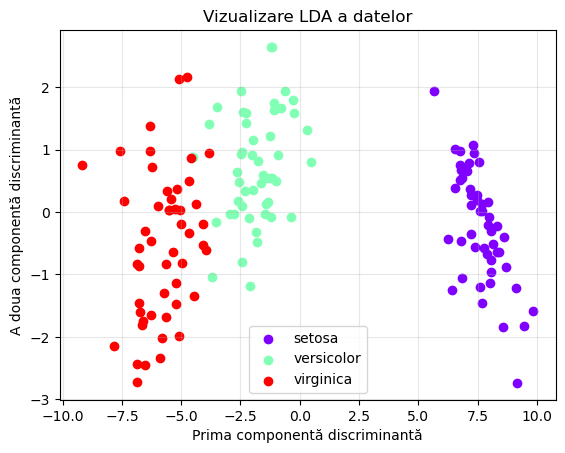

In [38]:
#Obtinem clasele unice din variabila raspuns
unique_classes = np.unique(df_response)

#Generam culori pentru fiecare clasa
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_classes)))

for color, class_label in zip(colors, unique_classes):
    mask = df_response == class_label
    #Selecteaza doar acele scoruri care apartin clasei folosind masca
    #Apoi selecteaza componenta 0 --> coordonata x si componenta 1 --> coordonata y
    #Masca functioneaza pentru ca pentru fiecare x,y din discriminant_scores are ca si corespondent un df_response 
    plt.scatter(discriminant_scores[mask, 0], discriminant_scores[mask, 1], 
                color=color,
                label=f'{class_label}')

plt.xlabel('Prima componentă discriminantă')
plt.ylabel('A doua componentă discriminantă')
plt.title('Vizualizare LDA a datelor')
plt.legend()
plt.grid(True, alpha=0.3)


### 3_ Trasare plot distributii in axe discriminate 
Todo: Nu stiu ce inseamna 

### 4_ Predictia in setul de testare model liniar
- Modelul de testare este folosit pentru a evalua cat de bine se descurca modelul in a face preziceri
- In modelul de testare se pot calcula metrice cu acuratete pentru ca stim deja valoarea variabilei care se incearca a fi prezisa
- Setul de date folosit este cel pe care modelul este antrenat

In [43]:
df_response_predicted = model.predict(df_predictor)
df_response_predicted

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor

### 5_ Evaluare model liniar pe setul de testare
- Pentru a evalua modelul liniar pe setul de testare avem nevoie de:
    - Indicatorii de acuratete
    - Matricea de confuzie

In [54]:
print(f"Indicatori de acuratete:\n1)Score: {model.score(df_predictor, df_response)}\n2)Classifiation report:\n {classification_report(df_response, df_response_predicted)}")
print('==========================================================')
print(f"Confusion Matrix:\n {confusion_matrix(df_response, df_response_predicted)}")

Indicatori de acuratete:
1)Score: 0.98
2)Classifiation report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.98      0.96      0.97        50
   virginica       0.96      0.98      0.97        50

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150

Confusion Matrix:
 [[50  0  0]
 [ 0 48  2]
 [ 0  1 49]]


### 6_ Predictia in setul de aplicare 
- Se face la fel ca in setul de testare doar ca nu se mai pot calcula metrici 
- Nu am vreun set de aplicare la mana pentru datele pe care le am asa ca o sa dau skip la asta

### 7_ Predictia in setul de aplicare model Bayesian
- Pentru a construi un model Bayesian ne folosim de QuadraticDiscriminantAnalysis din sklearn 
- Pasii sunt asemanatori 

In [60]:
qda = QuadraticDiscriminantAnalysis(store_covariance=True)
qda.fit(df_predictor, df_response)
df_response_predicted_qda = qda.predict(df_predictor)
df_response_predicted_qda

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor

### 8_ Evaluare model Bayesian pe date de testare

In [61]:
print(f"Indicatori de acuratete:\n1)Score: {qda.score(df_predictor, df_response)}\n2)Classifiation report:\n {classification_report(df_response, df_response_predicted)}")
print('==========================================================')
print(f"Confusion Matrix:\n {confusion_matrix(df_response, df_response_predicted)}")

Indicatori de acuratete:
1)Score: 0.98
2)Classifiation report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.98      0.96      0.97        50
   virginica       0.96      0.98      0.97        50

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150

Confusion Matrix:
 [[50  0  0]
 [ 0 48  2]
 [ 0  1 49]]
